<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Capstone-Project-1-Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Rahul_Chouhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project 1 - Hotel Booking Analysis/Hotel Bookings.csv')

In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
pd.__version__
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

(119390, 32)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df1 = df.copy()


In [ ]:
df1['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df1['is_canceled'].unique()


array([0, 1])

In [ ]:
df1['arrival_date_year'].unique()


array([2015, 2016, 2017])

In [ ]:
df1['meal'].unique()


array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df1['market_segment'].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df1['distribution_channel'].unique()


array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df1[df1.duplicated()].shape

(31994, 32)

In [ ]:
df1.drop_duplicates(inplace = True)

In [ ]:
df1.shape


(87396, 32)

In [ ]:
df[df['country']=='USA']['hotel'].value_counts()

City Hotel      1618
Resort Hotel     479
Name: hotel, dtype: int64

# **Cleaning and Manipulating Dataset**

In [ ]:
# Checking duplicates
print(len(df1[df1.duplicated()]))

0


In [ ]:
# Removing duplicates
df1.drop_duplicates(inplace=True)

# Checking Shape after removing duplicates
df1.shape

(87396, 32)

In [ ]:
# Converting the datatype of relevant columns from float to integer
#creating some new features
df1['same_room'] = np.where(df1['reserved_room_type']==df1['assigned_room_type'], 'yes', 'no')
df1['total_children'] = df1['children'] + df1['babies']
df1['total_members'] = df1['total_children'] + df1['adults']
df1["total_nights"] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']
df1['money_per_person']   = df1['adr'] * df1['total_nights'] / df1['total_members']
df1['guest_type']= np.where(df1['total_members']==1,'single',
                      np.where(df1['total_members']==2,'couple','family'))
df1['lead_time_category']= np.where(df1.lead_time<15,'low',
                              np.where((df1.lead_time>15)&(df1.lead_time<90),'medium','high'))

In [ ]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_children,total_members,total_nights,money_per_person
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,...,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87392.000000,87396.000000,87257.0
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,...,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567,0.149464,2.025243,3.630658,inf
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,...,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946,0.471738,0.794331,2.763449,NaN
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,-31.9
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000,0.000000,2.000000,2.000000,85.5
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000,0.000000,2.000000,3.000000,151.9
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000,0.000000,2.000000,5.000000,248.2
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,10.000000,55.000000,69.000000,inf


## **Top 10 countries in terms of number of bookings**



In [ ]:
top_10_countries = df[df['is_canceled']==0]['country'].value_counts()[:10]
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100
top_10_countries


,country,number_of_bookings,percentage
0,PRT,21071,34.070661
1,GBR,9676,15.645566
2,FRA,8481,13.713316
3,ESP,6391,10.333899
4,DEU,6069,9.813243
5,IRL,2543,4.111893
6,ITA,2433,3.934029
7,BEL,1868,3.020454
8,NLD,1717,2.776296
9,USA,1596,2.580645


Text(0.5, 1.0, 'Top 10 Countries by bookings percentage')

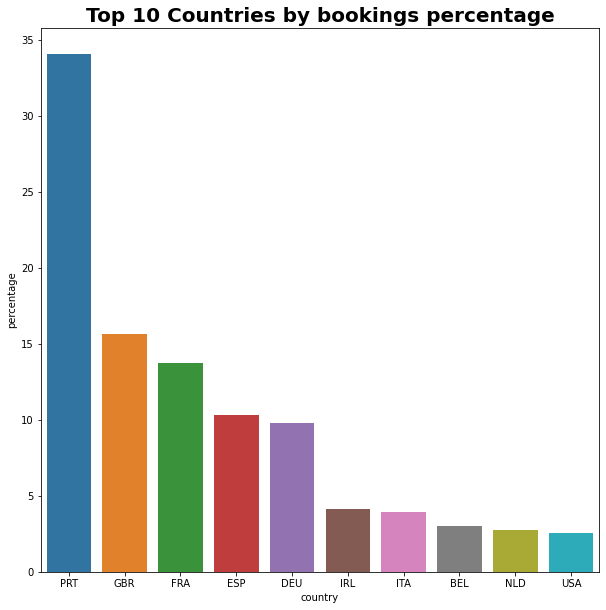

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)
plt.title('Top 10 Countries by bookings percentage',fontweight="bold", size=20)

## **Number of cancellations**

In [ ]:
df[df['is_canceled'] == 1]['arrival_date_month'].value_counts()


August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Number of cancellations per month')

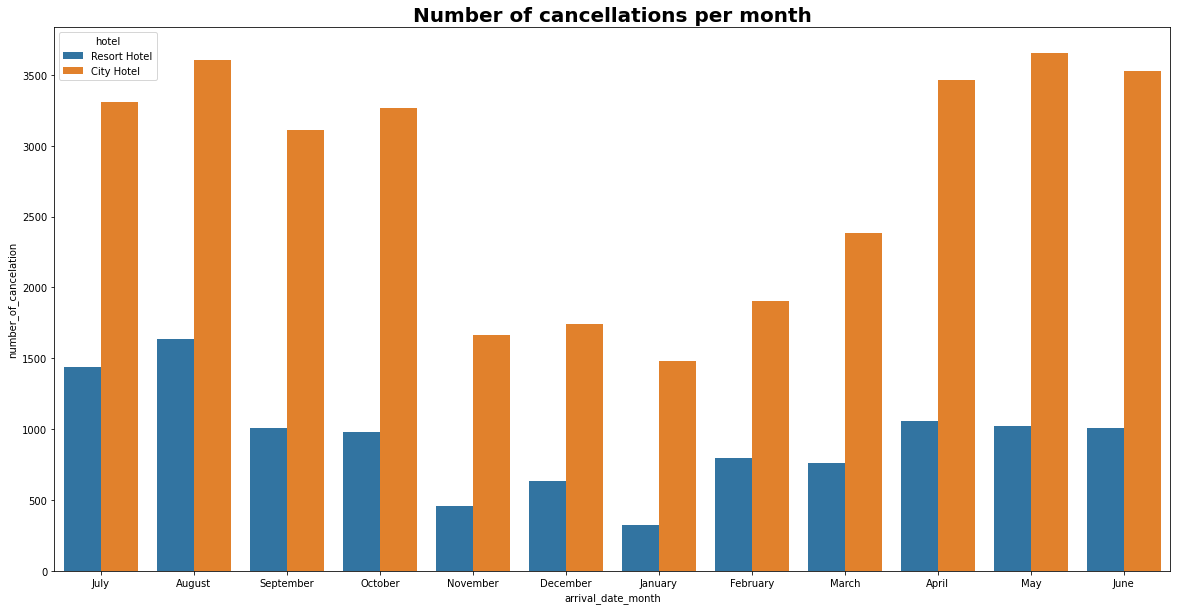

In [ ]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'arrival_date_month',hue = 'hotel', data = df[df['is_canceled'] == 1])
ax.set_ylabel('number_of_cancelation')
plt.title('Number of cancellations per month',fontweight="bold", size=20)

Text(0, 0.5, 'cancellation percentage')

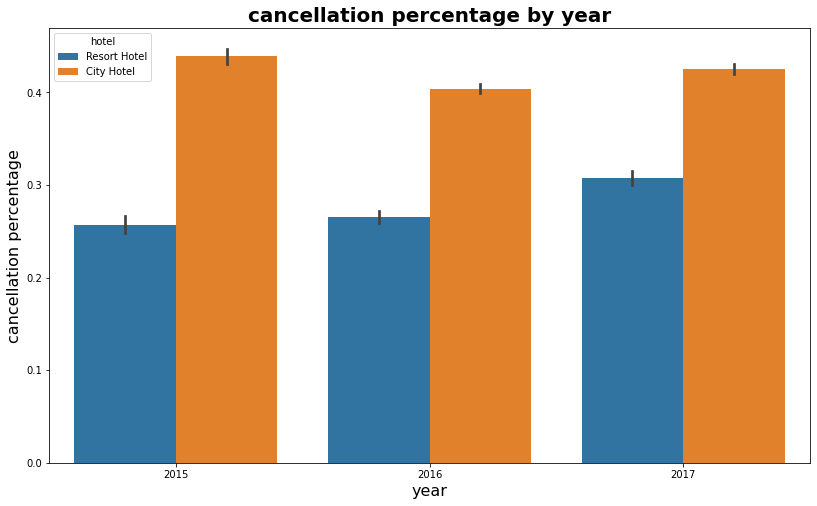

In [ ]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)

sns.barplot(data = df, x= 'arrival_date_year', y = 'is_canceled',hue = 'hotel' )
plt.title('cancellation percentage by year',fontweight="bold", size=20)

plt.xlabel('year',size=16)
plt.ylabel('cancellation percentage',size=16)

Text(0, 0.5, 'Cancelations [%]')

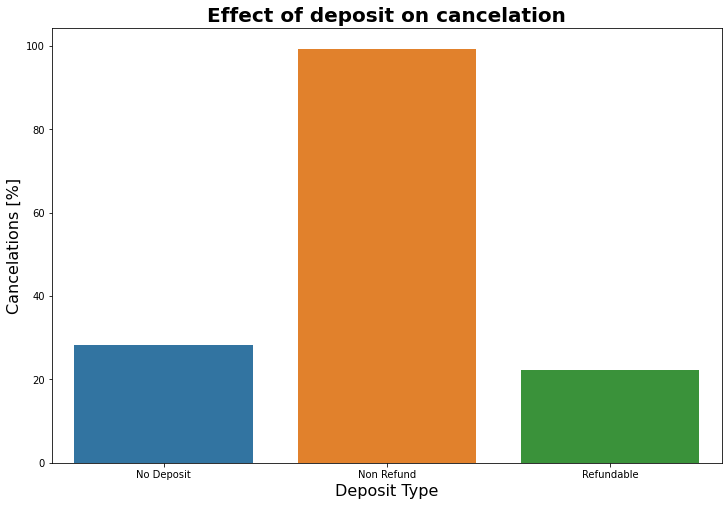

In [ ]:
deposit_df = df.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Effect of deposit on cancelation", fontweight="bold", fontsize=20)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

In [ ]:
deposit_df


,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,104641.0,0.283770,0.450829,0.0,0.0,0.0,1.0,1.0
Non Refund,14587.0,0.993624,0.079595,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


## **Total number of Children in both the hotels**

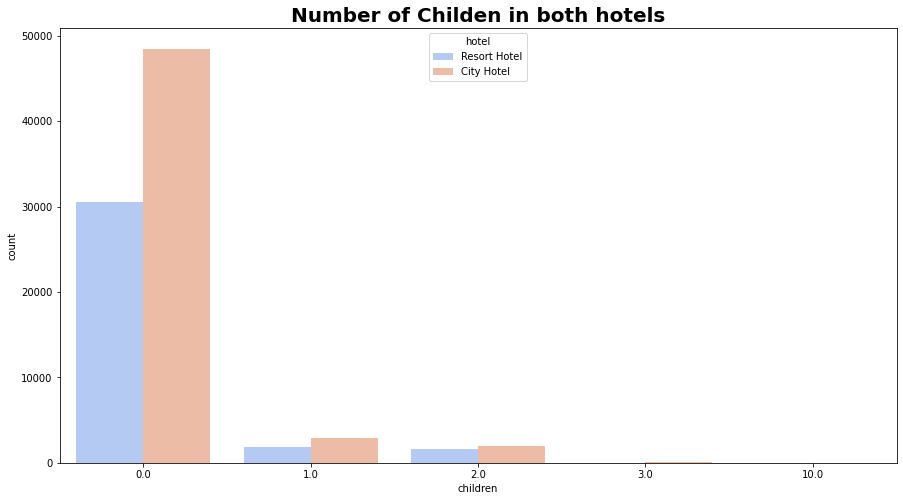

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='children',hue='hotel', data=df1, palette='coolwarm')
plt.title("Number of Childen in both hotels",fontweight="bold", size=20)

plt.show()

## **Number of bookings in different years.**

Text(0.5, 1.0, 'Number of bookings on different years')

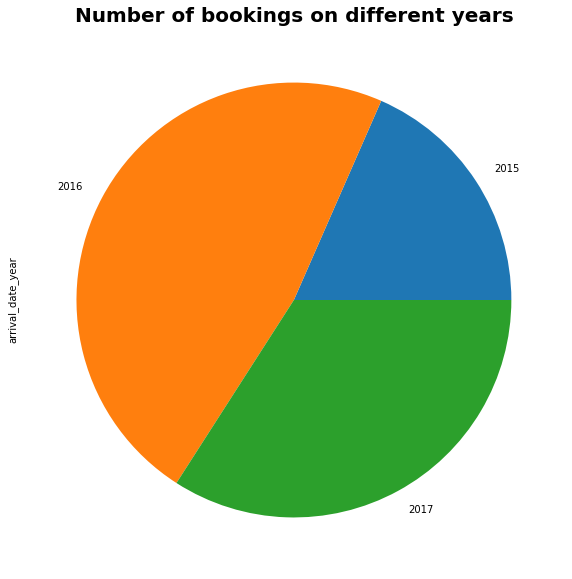

In [ ]:
#Graph representing number of bookings acroos different years
year_counts = df['arrival_date_year'].value_counts().sort_index()
plt.rcParams['figure.figsize'] = (20,10)
year_counts.plot(kind = 'pie')
plt.grid()
plt.title('Number of bookings on different years', fontweight="bold", fontsize = 20)

## **Which hotel seems to make more revenue?**


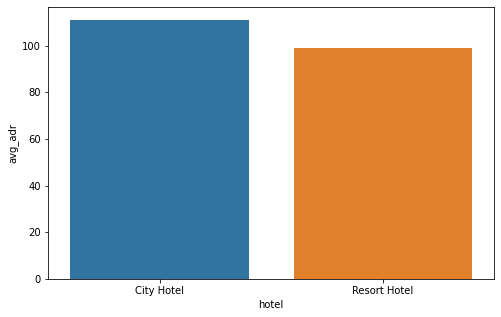

In [ ]:
grouped_by_hotel = df1.groupby('hotel')
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

## **Which month results in highest revenue?**


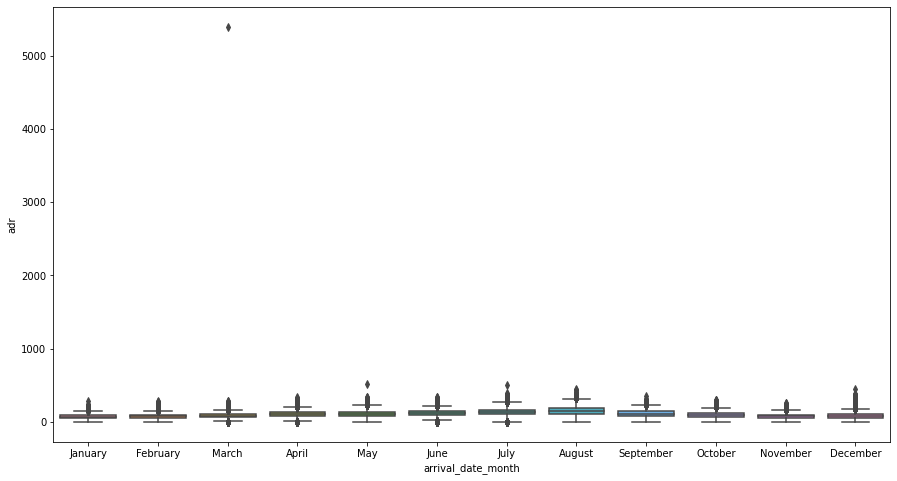

In [ ]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.show()

## **Which hotel has high number of repeat customers?**

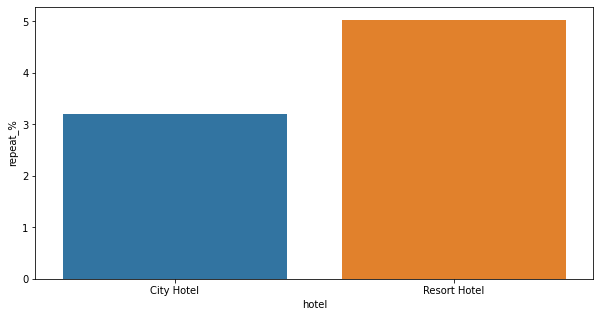

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

## **Which channel is mostly used for early booking of hotels?**

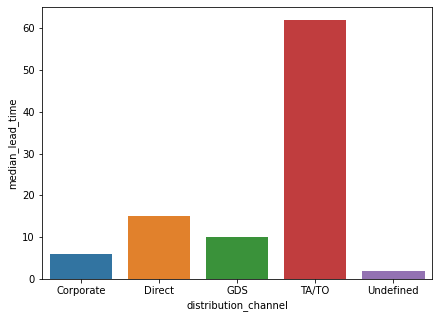

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

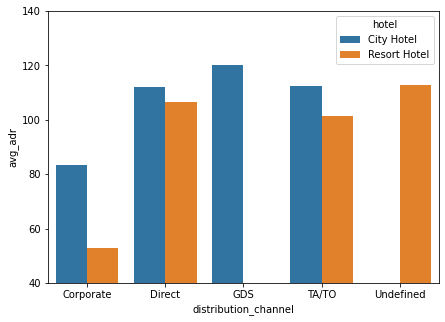

In [ ]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()